
### clean = 0
### hate = 1

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)

In [2]:
df = pd.read_csv('labeled_data.csv')

In [3]:
df.head(15)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; thats that """
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch"


In [4]:
df.shape

(24783, 7)

In [87]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
 

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
# drop extra col
df = df[['class','tweet']]

In [8]:
df.sample(5)

,class,tweet
5082,2,"@VNNForum These Marxist kikes promoted Anti-Semitism by creating this film, what was their incentive? They just promote their enemies."
35,1,""" is that ya bitch """
14918,1,"RT @DamnitCorn: This bitch does so begrudgingly as fuck. Was like""man up you a big bad man crying like a bitch."""
8146,1,Bout to dub dis bitch
14062,1,RT @AC_Hussle: Real RT @iHitModelsRaw: All jokes aside the hoes I know some of the coolest women I've ever met


In [9]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [10]:
# missing values
df.isnull().sum()

class    0
tweet    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

0

In [12]:
def class_encode(x):
    if x==2:
        return 0
    else:
        return 1

In [13]:
df['class'] = df['class'].apply(lambda x: class_encode(x))

In [14]:
df.head(10)

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,1,""" &amp; you might not get ya bitch back &amp; thats that """
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch"


## 2.EDA

In [15]:
df.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [16]:
df['class'].value_counts()

1    20620
0     4163
Name: class, dtype: int64

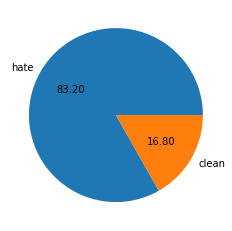

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['hate','clean'],autopct="%0.2f")
plt.show()

In [18]:
# Data is imbalanced

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [22]:
df['number_of_char'] = df['tweet'].apply(len)

In [23]:
df.head()

,class,tweet,number_of_char
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137


In [24]:
# num of words
df['number_of_word'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,class,tweet,number_of_char,number_of_word
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43


In [26]:
df['number_of_sentences'] = df['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2


In [28]:
df[['number_of_char','number_of_word','number_of_sentences']].describe()

,number_of_char,number_of_word,number_of_sentences
count,24783.000000,24783.000000,24783.000000
mean,85.436065,19.950571,1.388048
std,41.548238,11.849023,0.715168
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,81.000000,18.000000,1.000000
75%,119.000000,27.000000,2.000000
max,754.000000,321.000000,8.000000


In [29]:
# clean
df[df['class'] == 0][['number_of_char','number_of_word','number_of_sentences']].describe()

,number_of_char,number_of_word,number_of_sentences
count,4163.000000,4163.000000,4163.000000
mean,94.850108,21.016575,1.564016
std,41.054325,10.927834,0.833825
min,7.000000,1.000000,1.000000
25%,60.000000,13.000000,1.000000
50%,97.000000,21.000000,1.000000
75%,132.000000,28.000000,2.000000
max,522.000000,274.000000,6.000000


In [30]:
#spam
df[df['class'] == 1][['number_of_char','number_of_word','number_of_sentences']].describe()

,number_of_char,number_of_word,number_of_sentences
count,20620.000000,20620.000000,20620.000000
mean,83.535451,19.735354,1.352522
std,41.389241,12.015225,0.683283
min,5.000000,1.000000,1.000000
25%,50.000000,11.000000,1.000000
50%,78.000000,18.000000,1.000000
75%,115.000000,27.000000,2.000000
max,754.000000,321.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

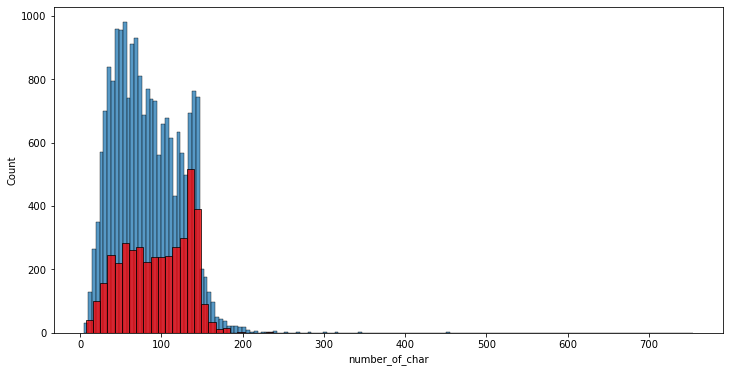

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['number_of_char'])
sns.histplot(df[df['class'] == 0]['number_of_char'],color='red')


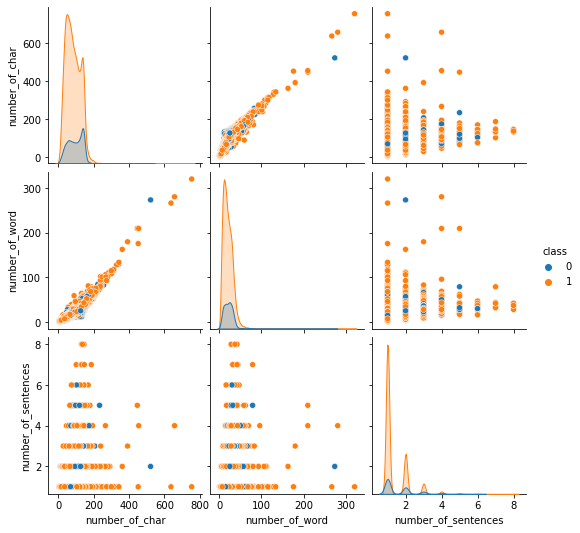

In [33]:
sns.pairplot(df,hue='class')

<AxesSubplot:>

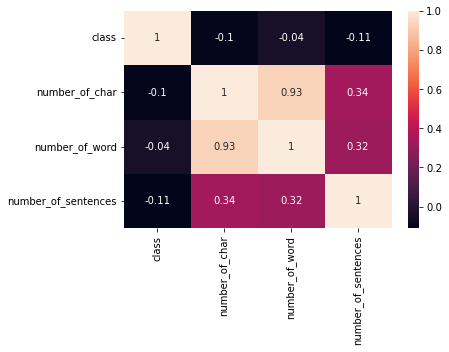

In [34]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- remove mention, RT
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

#### remove mentions ( #, @ )

In [35]:
df['clean_tweet']=df['tweet'].apply(lambda x: " ".join(word for word in x.split() if not word.startswith(('#','@'))))


In [36]:
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3,!!! RT As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3,!!!!! RT boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4,!!!!!!! RT Dawg!!!! RT You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2,!!!!!!!!! RT she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2,!!!!!!!!!!!!! RT The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): # Alpha numeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [39]:
df['clean_tweet'] = df['clean_tweet'].apply(transform_text)

In [40]:
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3,rt woman complain clean hous amp man alway take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3,rt boy dat cold tyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4,rt dawg rt ever fuck bitch start cri confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2,rt look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2,rt shit hear might true might faker bitch told ya 57361


### remove rt

In [41]:
import re

In [42]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub('rt','',x))

In [43]:
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3,woman complain clean hous amp man alway take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3,boy dat cold tyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4,dawg ever fuck bitch sta cri confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2,look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2,shit hear might true might faker bitch told ya 57361


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
hate_wc = wc.generate(df[df['class'] == 1]['clean_tweet'].str.cat(sep=" "))

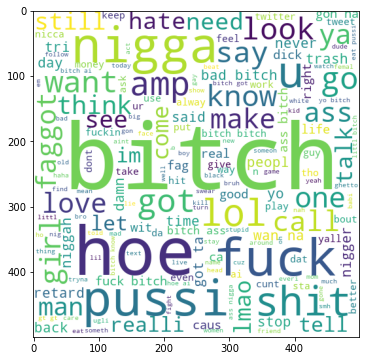

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(hate_wc)

In [47]:
clean_wc = wc.generate(df[df['class'] == 0]['clean_tweet'].str.cat(sep=" "))

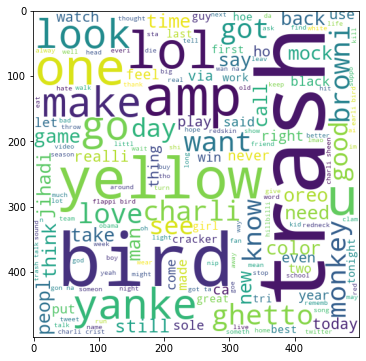

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(clean_wc)

In [49]:
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3,woman complain clean hous amp man alway take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3,boy dat cold tyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4,dawg ever fuck bitch sta cri confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2,look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2,shit hear might true might faker bitch told ya 57361


In [50]:
hate_corpus = []
for msg in df[df['class'] == 1]['clean_tweet'].tolist():
    for word in msg.split():
        hate_corpus.append(word)
        

In [51]:
len(hate_corpus)

167198

/home/arafat/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


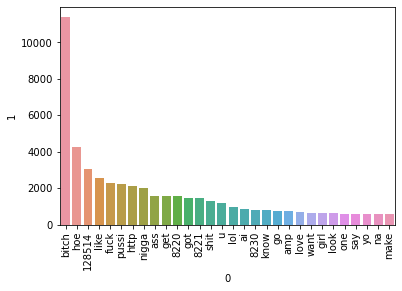

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(hate_corpus).most_common(30))[0],pd.DataFrame(Counter(hate_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
clean_corpus = []
for msg in df[df['class'] == 0]['clean_tweet'].tolist():
    for word in msg.split():
        clean_corpus.append(word)

In [54]:
len(clean_corpus)

35326

/home/arafat/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


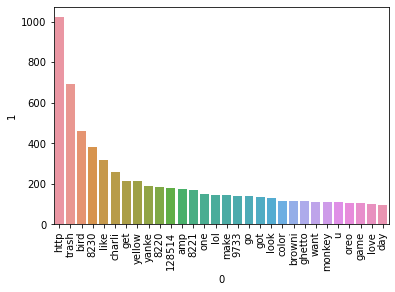

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(clean_corpus).most_common(30))[0],pd.DataFrame(Counter(clean_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
 
df.head()

,class,tweet,number_of_char,number_of_word,number_of_sentences,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,140,34,3,woman complain clean hous amp man alway take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,85,26,3,boy dat cold tyga dwn bad cuffin dat hoe 1st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,120,35,4,dawg ever fuck bitch sta cri confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,62,20,2,look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,137,43,2,shit hear might true might faker bitch told ya 57361


## 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['clean_tweet']).toarray()

In [59]:
X.shape

(24783, 3000)

In [60]:
y = df['class'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5386322372402663
[[ 728  126]
 [2161 1942]]
0.9390715667311412


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8890457938269114
[[ 337  517]
 [  33 4070]]
0.8872901678657075


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9301997175711115
[[ 663  191]
 [ 155 3948]]
0.9538535878231457


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
 

In [70]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
 
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [72]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9505749445228969, 0.9744220363994097)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9505749445228969
Precision -  0.9744220363994097
For  KN
Accuracy -  0.6671373814807343
Precision -  0.8904807386182745
For  NB
Accuracy -  0.8890457938269114
Precision -  0.8872901678657075
For  DT
Accuracy -  0.8521283034093201
Precision -  0.9967570754716981
For  LR
Accuracy -  0.956021787371394
Precision -  0.9859894921190894
For  RF
Accuracy -  0.944321161993141
Precision -  0.9686505020818026
For  AdaBoost
Accuracy -  0.9441194270728263
Precision -  0.9862735129639044
For  BgC
Accuracy -  0.9536009683276175
Precision -  0.9759154583435734
For  ETC
Accuracy -  0.9433124873915675
Precision -  0.9651898734177216
For  GBDT
Accuracy -  0.8959047811176114
Precision -  0.9036686923250056


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.852128,0.996757
6,AdaBoost,0.944119,0.986274
4,LR,0.956022,0.985989
7,BgC,0.953601,0.975915
0,SVC,0.950575,0.974422
5,RF,0.944321,0.968651
8,ETC,0.943312,0.965190
9,GBDT,0.895905,0.903669
1,KN,0.667137,0.890481
2,NB,0.889046,0.887290


In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [77]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.852128
1,AdaBoost,Accuracy,0.944119
2,LR,Accuracy,0.956022
3,BgC,Accuracy,0.953601
4,SVC,Accuracy,0.950575
5,RF,Accuracy,0.944321
6,ETC,Accuracy,0.943312
7,GBDT,Accuracy,0.895905
8,KN,Accuracy,0.667137
9,NB,Accuracy,0.889046


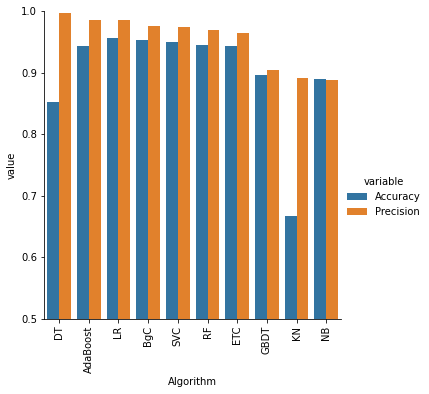

In [78]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))